In [5]:
# 지난과정중 보스턴 지역 집값 예측 
# 그것보다 지금 처리할 파일 컬럼이 훨씬 많다고함.
# 따로 정리된 파일로 연습 진행.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [94]:
data0= pd.read_csv("./data/house_train.csv")
data0

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

## 주의
- 카테고리 컬럼 정보. 원핫인코딩 다하면 1천개가 넘는 문제가 있음
- 연속 데이터라면 Dense(1) 괄호안에 시그모이드나 다른 값 추가하지 않음 - 모델 출력층
- 회귀분석때 썼던 loss='mean_squared_error',metrics='mse' - 모델 컴파일때
- 위 조건을 제외하면 DNN 구성이 동일한점.

In [ ]:
# 어떤 데이터가 종속변수인지 모르겠음 d0d
data0['']


In [95]:
# 결측 있어요~~~~
print(data0.head())
print("data0.info() 결과")
print(data0.info())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7          

In [78]:
# 삭제 할게 너무 많음
# 삭제기준 
missing_rate = data0.isna().sum() / len(data0) *100
# 결측 50 미만인것들 중앙값으로 대체하겠음.

In [79]:
cols = missing_rate[missing_rate < 50].index

In [80]:
data=data0[cols]

In [92]:
# 남겨진 컬럼들 체크
remain=(data.isna().sum() / len(data0) *100).sort_values(ascending=False)
print(remain.to_string())

FireplaceQu      47.260274
GarageFinish      5.547945
GarageQual        5.547945
GarageType        5.547945
GarageCond        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
Electrical        0.068493
Id                0.000000
Neighborhood      0.000000
LandSlope         0.000000
LotConfig         0.000000
Utilities         0.000000
LandContour       0.000000
LotShape          0.000000
Street            0.000000
LotArea           0.000000
LotFrontage       0.000000
MSZoning          0.000000
MSSubClass        0.000000
BldgType          0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Condition1        0.000000
Condition2        0.000000
Foundation        0.000000
ExterCond         0.000000
ExterQual         0.000000
MasVnrArea        0.000000
Exterior2nd       0.000000
Exterior1st       0.000000
BsmtFinSF2        0.000000
BsmtFinSF1        0.000000
BsmtUnfSF         0.000000
T

In [93]:
# 50%이상은 삭제 - 내림차순이므로 제거할 인덱스 카피 쉬움.
(data.isna().sum() / len(data0) *100).sort_values(ascending=False).index

Index(['FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageCond',
       'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
       'Electrical', 'Id', 'Neighborhood', 'LandSlope', 'LotConfig',
       'Utilities', 'LandContour', 'LotShape', 'Street', 'LotArea',
       'LotFrontage', 'MSZoning', 'MSSubClass', 'BldgType', 'RoofStyle',
       'RoofMatl', 'Condition1', 'Condition2', 'Foundation', 'ExterCond',
       'ExterQual', 'MasVnrArea', 'Exterior2nd', 'Exterior1st', 'BsmtFinSF2',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'LowQualFinSF', '2ndFlrSF', '1stFlrSF', 'CentralAir', 'Heating',
       'BsmtFullBath', 'HalfBath', 'GrLivArea', 'KitchenQual', 'KitchenAbvGr',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'Functional',
       'BsmtHalfBath', 'FullBath', 'GarageCars', 'GarageYrBlt', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenP

In [ ]:
# 0522:16:8 
data=data.drop(['드롭할컬럼','드롭할 컬럼2'])

In [96]:
# 문자형 컬럼들 모으기
missing_cal=(data.isna().sum() / len(data0) *100).sort_values(ascending=False).index

In [99]:
missing_cal=['FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageCond','BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1','Electrical']

In [100]:
# object인 것들
for col in missing_cal:
    if data[col].dtype=='object':
        print(col)
    else:
        continue

FireplaceQu
GarageFinish
GarageQual
GarageType
GarageCond
BsmtFinType2
BsmtExposure
BsmtQual
BsmtCond
BsmtFinType1
Electrical


In [101]:
# object인 것들 중 결측값 있으면 채우기
for col in missing_cal:
    if data[col].dtype=='object':
        data[col]=data[col].fillna(data[col].mode()[0])
    else:
        data[col]=data[col].fillna(data[col].median())

/tmp/ipykernel_4369/800950821.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col]=data[col].fillna(data[col].mode()[0])


In [102]:
# 이상값 확인
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

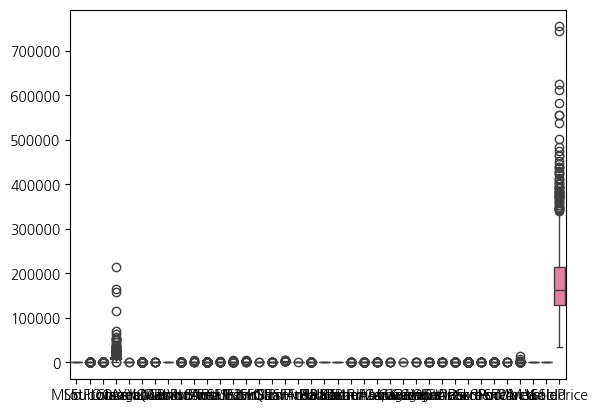

In [103]:
sns.boxplot(data) # 이상값 보이긴하는데 눌려서 잘안보임

<Axes: >

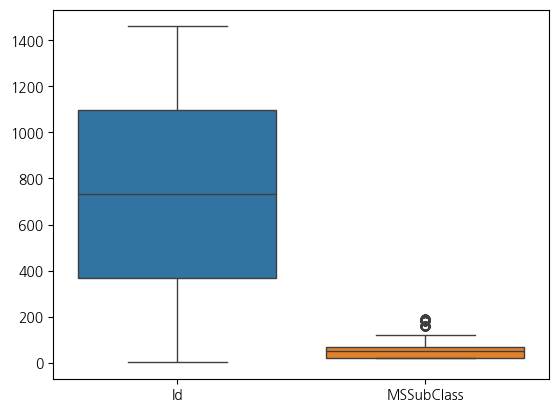

In [106]:
sns.boxplot(data.iloc[:, :3])

<Axes: >

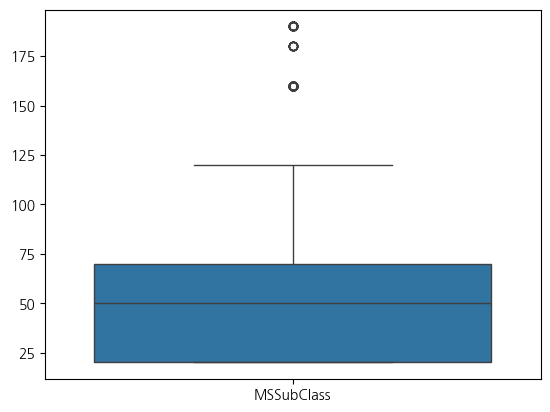

In [107]:
sns.boxplot(data.iloc[:, 1:3])

<Axes: >

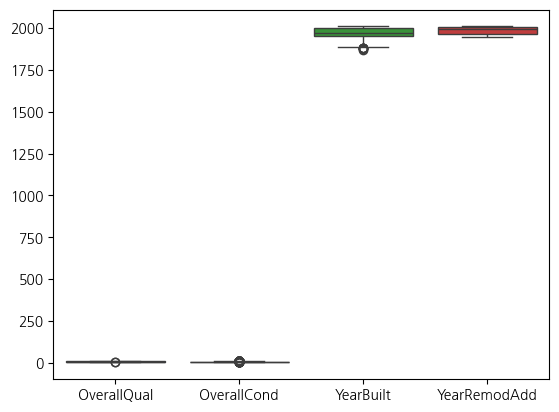

In [110]:
# 카테고리면 눌러도 안나올것
sns.boxplot(data.iloc[:, 16:20])

<Axes: >

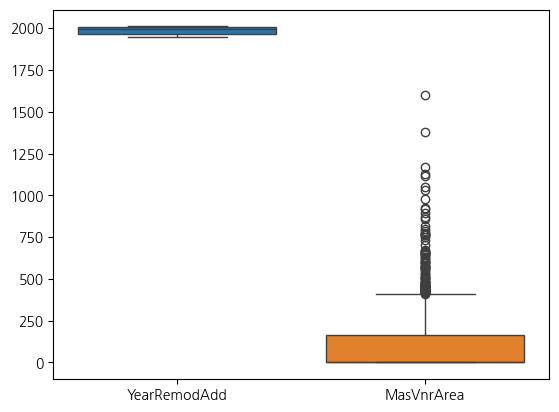

In [111]:
# 카테고리면 눌러도 안나올것
sns.boxplot(data.iloc[:, 19:26])

In [ ]:
# 부스팅모델 사용했을때 이상값 제거하지 않고 했듯이 딥러닝도 비슷하다

In [113]:
X=data.drop(["SalePrice",'Id'], axis=1)
y=data['SalePrice']

In [114]:
X.head(2) # 더미변수

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal


In [115]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [119]:
X=pd.get_dummies(X)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,P

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [121]:
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=42)

In [149]:
rs=RobustScaler()
rs_X_train=rs.fit_transform(X_train)
rs_X_valid=rs.transform(X_valid)


In [143]:
import joblib
joblib.dump(rs,"./model/iowa_rs_.joblib")

['./model/iowa_rs_.joblib']

In [147]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
# 루트 민 스퀘어 에러 따로 불러오기

In [150]:
# 모델 구성
inputs = Input(shape=(rs_X_train.shape[1], ))
x=Dense(32, activation='relu')(inputs)
x=Dense(16, activation='relu')(x)
x=Dropout(0.3)(x)
outputs=Dense(1)(x) # 출력층에 다른 조건 없는점
base_model=Model(inputs=inputs, outputs=outputs)
base_model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 271)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │         8,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,249 (36.13 KB)

 Trainable params: 9,249 (36.13 KB)

 Non-trainable params: 0 (0.00 B)

In [145]:
# 모델 구성
inputs = Input(shape=(rs_X_train.shape[1], ))
x=Dense(32, activation='relu')(inputs)
x=Dense(16, activation='relu')(x)
x=Dropout(0.3)(x)
outputs=Dense(1)(x) # 출력층에 다른 조건 없는점
base_model=Model(inputs=inputs, outputs=outputs)
base_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 271)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         8,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,249 (36.13 KB)

 Trainable params: 9,249 (36.13 KB)

 Non-trainable params: 0 (0.00 B)

In [137]:
# 모델 가져와서 
base_model.compile(loss='mean_squared_error', optimizer='adam', metrics=[RootMeanSquaredError()]) # 루민세아니면 mse도 가능
early_Stop=EarlyStopping(monitor='val_loss',patience=10, restore_best_weights=True)
model_path= "./model/iowa_base_model_best.keras"
check_point=ModelCheckpoint(filepath=model_path,monitor='val_loss', save_best_only=True)
base_model_history=base_model.fit(rs_X_train, y_train, epochs=1000,batch_size=32,
                                 validation_data=(rs_X_valid, y_valid),
                                 callbacks=[early_Stop,check_point], verbose=1)

Epoch 1/1000


I0000 00:00:1747900188.114818    4632 service.cc:152] XLA service 0x7f55ec004920 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747900188.114889    4632 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce MX450, Compute Capability 7.5
2025-05-22 16:49:48.171159: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1747900188.627251    4632 cuda_dnn.cc:529] Loaded cuDNN version 90300


19/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 40894754816.0000 - root_mean_squared_error: 202166.7344

I0000 00:00:1747900190.464879    4632 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - loss: 40247046144.0000 - root_mean_squared_error: 200573.9688 - val_loss: 39370207232.0000 - val_root_mean_squared_error: 198419.2656
Epoch 2/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 41483374592.0000 - root_mean_squared_error: 203588.2656 - val_loss: 39352721408.0000 - val_root_mean_squared_error: 198375.2031
Epoch 3/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 37525389312.0000 - root_mean_squared_error: 193695.5938 - val_loss: 39318876160.0000 - val_root_mean_squared_error: 198289.8750
Epoch 4/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 40018808832.0000 - root_mean_squared_error: 199988.9688 - val_loss: 39247261696.0000 - val_root_mean_squared_error: 198109.2188
Epoch 5/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 39170519040.0000 - root_mean_squared_error: 197871.4375 - val_loss: 39122362368.0000 - val_root_mean_squared_error: 197793.7344
Epoch 6/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3789716

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 23989065728.0000 - root_mean_squared_error: 154819.5469 - val_loss: 24712284160.0000 - val_root_mean_squared_error: 157201.4062
Epoch 38/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 23185256448.0000 - root_mean_squared_error: 152124.2031 - val_loss: 24277186560.0000 - val_root_mean_squared_error: 155811.3750
Epoch 39/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 22365114368.0000 - root_mean_squared_error: 149503.3906 - val_loss: 23810719744.0000 - val_root_mean_squared_error: 154307.2188
Epoch 40/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 23316768768.0000 - root_mean_squared_error: 152628.6406 - val_loss: 23307689984.0000 - val_root_mean_squared_error: 152668.5625
Epoch 41/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 21862674432.0000 - root_mean_squared_error: 147734.2812 - val_loss: 22922907648.0000 - val_root_mean_squared_error: 151403.1250
Epoch 42/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 22

Epoch 74/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 7421182464.0000 - root_mean_squared_error: 86124.1328 - val_loss: 6983192576.0000 - val_root_mean_squared_error: 83565.5000
Epoch 75/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 7736730112.0000 - root_mean_squared_error: 87923.3516 - val_loss: 6619664896.0000 - val_root_mean_squared_error: 81361.3203
Epoch 76/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 7202227200.0000 - root_mean_squared_error: 84806.9297 - val_loss: 6228549120.0000 - val_root_mean_squared_error: 78921.1562
Epoch 77/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 6268114432.0000 - root_mean_squared_error: 79123.3125 - val_loss: 5910319104.0000 - val_root_mean_squared_error: 76878.5938
Epoch 78/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 6328337920.0000 - root_mean_squared_error: 79474.8750 - val_loss: 5547136000.0000 - val_root_mean_squared_error: 74479.0938
Epoch 79/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 56177674

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3037896192.0000 - root_mean_squared_error: 55086.7734 - val_loss: 2229453568.0000 - val_root_mean_squared_error: 47217.0898
Epoch 112/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3134257920.0000 - root_mean_squared_error: 55816.9844 - val_loss: 2118050048.0000 - val_root_mean_squared_error: 46022.2773
Epoch 113/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3168610304.0000 - root_mean_squared_error: 56186.4141 - val_loss: 2074364288.0000 - val_root_mean_squared_error: 45545.1875
Epoch 114/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3923447040.0000 - root_mean_squared_error: 62428.3398 - val_loss: 2077243904.0000 - val_root_mean_squared_error: 45576.7930
Epoch 115/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3379868416.0000 - root_mean_squared_error: 58008.6406 - val_loss: 2058840704.0000 - val_root_mean_squared_error: 45374.4492
Epoch 116/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3317781248.0000 -

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2941850624.0000 - root_mean_squared_error: 54197.0352 - val_loss: 1857784960.0000 - val_root_mean_squared_error: 43102.0273
Epoch 149/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2746147584.0000 - root_mean_squared_error: 52364.9727 - val_loss: 1837370752.0000 - val_root_mean_squared_error: 42864.5625
Epoch 150/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3050173440.0000 - root_mean_squared_error: 55115.0742 - val_loss: 1842932864.0000 - val_root_mean_squared_error: 42929.3945
Epoch 151/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4028054528.0000 - root_mean_squared_error: 62765.7031 - val_loss: 1858500864.0000 - val_root_mean_squared_error: 43110.3320
Epoch 152/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3144380160.0000 - root_mean_squared_error: 56009.9375 - val_loss: 1835774080.0000 - val_root_mean_squared_error: 42845.9336
Epoch 153/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2863215616.0000 -

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3037737984.0000 - root_mean_squared_error: 55060.2656 - val_loss: 1719692160.0000 - val_root_mean_squared_error: 41469.1719
Epoch 186/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3072808448.0000 - root_mean_squared_error: 55379.5781 - val_loss: 1778229248.0000 - val_root_mean_squared_error: 42169.0547
Epoch 187/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3487213056.0000 - root_mean_squared_error: 58686.8086 - val_loss: 1827531008.0000 - val_root_mean_squared_error: 42749.6328
Epoch 188/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3059954176.0000 - root_mean_squared_error: 55177.2109 - val_loss: 1742488576.0000 - val_root_mean_squared_error: 41743.1250
Epoch 189/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2481764096.0000 - root_mean_squared_error: 49456.2344 - val_loss: 1791577088.0000 - val_root_mean_squared_error: 42327.0234
Epoch 190/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2842876416.0000 -

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2779837440.0000 - root_mean_squared_error: 52613.6211 - val_loss: 1674166400.0000 - val_root_mean_squared_error: 40916.5781
Epoch 223/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2520601600.0000 - root_mean_squared_error: 50138.4922 - val_loss: 1631416320.0000 - val_root_mean_squared_error: 40390.7930
Epoch 224/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2858751232.0000 - root_mean_squared_error: 53309.9258 - val_loss: 1633775488.0000 - val_root_mean_squared_error: 40419.9883
Epoch 225/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2645673216.0000 - root_mean_squared_error: 51410.1602 - val_loss: 1580003840.0000 - val_root_mean_squared_error: 39749.2617
Epoch 226/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2692993024.0000 - root_mean_squared_error: 51874.0430 - val_loss: 1625690112.0000 - val_root_mean_squared_error: 40319.8477
Epoch 227/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3089418240.0000 - root

In [151]:
# Xvalid값

pred = base_model.predict(rs_X_valid)
pred = pd.DataFrame(pred, columns=['pred'])
pred

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


,pred
0,-0.426338
1,0.112312
2,-7.990553
3,-1.940284
4,-0.080173
...,...
433,-0.159657
434,-0.265376
435,0.247503
436,-70.284096


In [153]:
y_valid = pd.DataFrame(y_valid)
y_valid_df = y_valid.reset_index(drop=True)
final_result=y_valid_df.join(pred)
final_result # 하나씩 비교하면 감이안오니까 다음에서


,SalePrice,pred
0,154500,-0.426338
1,325000,0.112312
2,115000,-7.990553
3,159000,-1.940284
4,315500,-0.080173
...,...,...
433,139000,-0.159657
434,126175,-0.265376
435,205950,0.247503
436,110000,-70.284096


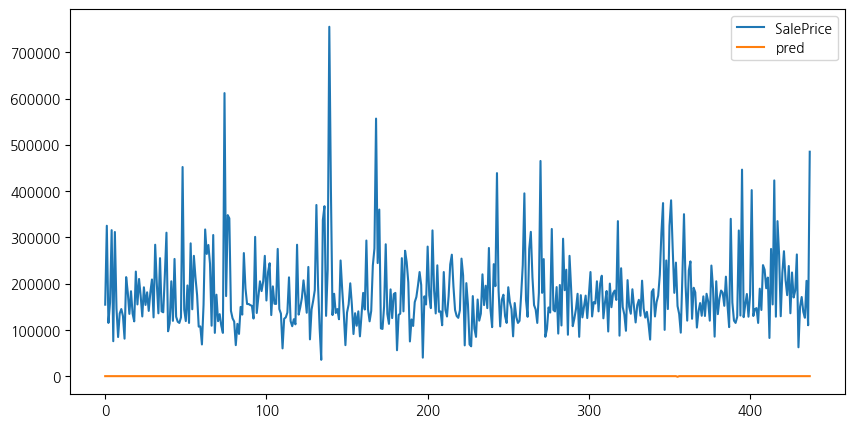

ValueError: You must call `compile()` before using the model.

In [156]:
# 그래프로 그려 확인하기
plt.figure(figsize=(10,5))
plt.plot(final_result['SalePrice'], label='SalePrice')
plt.plot(final_result['pred'], label='pred')
plt.legend()
plt.show()
print(base_model.evaluate(rs_X_valid, y_valid))



# 많은 컬럼중에 무엇을 해야하는가?
- 266개나되니까 정말 중요한게있을거고 아닌게 있을텐데
- 상관도가 높아서 서로 예측 방해되는 경우도 있을것
- 전진선택법 L1L2와 같이 무력화시키는 방법이 있고
- 딥러닝에도 비슷한 작업이 필요하다.
- 방법1. 컬럼간 상관분석을 통해 타겟변수(종속변수)와 상관도가 높은 컬럼만 선택
- 방법2. 트리계열 알고리즘으로 분석후 Futureimpotance 중요변수만 추출해 재분석

In [ ]:
data.corr(method='spearman')['SalePrice']

In [82]:
# 결측치 아직도있는것들 대체하기
dache = missing_rate[missing_rate > 0].index

In [83]:
# 결측치 아직도있는것들 대체하기
data_replc= data0[dache]
replace=data_replc.isna().sum() / len(data0) *100
print(replace.to_string)

<bound method Series.to_string of LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64>


In [84]:
# 반복문을 이용하여 nan 값만 중앙값으로 변환
for col in data.columns:
    if data[col].isna().sum() > 0 and data[col].dtype != 'object':
        data[col] = data[col].fillna(data[col].median())

print("\n변경 후 NaN 개수:\n", data.isna().sum().to_string)


변경 후 NaN 개수:
 <bound method Series.to_string of Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64>


/tmp/ipykernel_4369/2182671820.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].fillna(data[col].median())
/tmp/ipykernel_4369/2182671820.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].fillna(data[col].median())
/tmp/ipykernel_4369/2182671820.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [66]:
# 결측치 있는 인덱스들 모으기
na_indices = {}  

for col in data.columns:
    na_idx = data[data[col].isna()].index
    na_indices[col] = na_idx  # 이부분을 몰라서 못 짜고있었네.

    
    
## 아래내용이 위처럼 반복문화 할 수 있음
# 결측치 일일이 모으기
na_idx1=data[data['LotFrontage'].isna()].index

In [90]:
# 잔여결측치 체크- 결측치 있던위치
data.loc[na_indices[col], col]

Series([], Name: SalePrice, dtype: int64)